In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [130]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [132]:
# Label Encoding
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [133]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [134]:
feature = ['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

In [135]:
# Xs
X = df[feature].values
X = StandardScaler().fit_transform(X)
ClusterNum = 4
X[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

## K-Means

In [136]:
# Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(init = "k-means++", n_clusters = ClusterNum, n_init = 10)
kmeans.fit(X)
labels = kmeans.labels_
df['K-means Cluster'] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-means Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [137]:
df.groupby(['K-means Cluster', 'Gender']).mean()

,,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
K-means Cluster,Gender,,,,
0,1,104.958333,49.437500,62.416667,29.208333
1,0,100.210526,28.438596,59.666667,67.684211
2,0,94.818182,48.109091,58.818182,34.781818
3,1,103.375000,28.250000,62.000000,71.675000


C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_15292/409316060.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,2], X[:,3], s = area, c = labels.astype(np.float), alpha = 0.5)


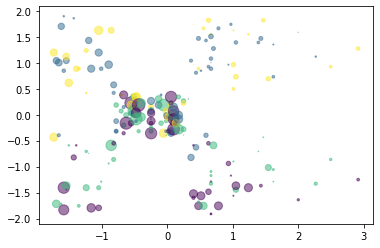

In [138]:
# Plot
area = (np.pi*(X[:,1])**2)*10
plt.scatter(X[:,2], X[:,3], s = area, c = labels.astype(np.float), alpha = 0.5)


**K-means Clusters:**
* Clusrer 1: Female, Young, High Spending Score
* Cluster 2: Female, Old, Low Spending Score
* Clusrer 3: male, Young, High Spending Score
* Cluster 4: male, Old, Low Spending Score

## Heirarchical

In [141]:
# Check Xs
X[0:10]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

In [142]:
# Distanse Matrix
from sklearn.metrics.pairwise import euclidean_distances
dm = euclidean_distances(X)

In [143]:
# Hierarchical
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(dm, method = 'complete')

C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_15292/4049233678.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dm, method = 'complete')


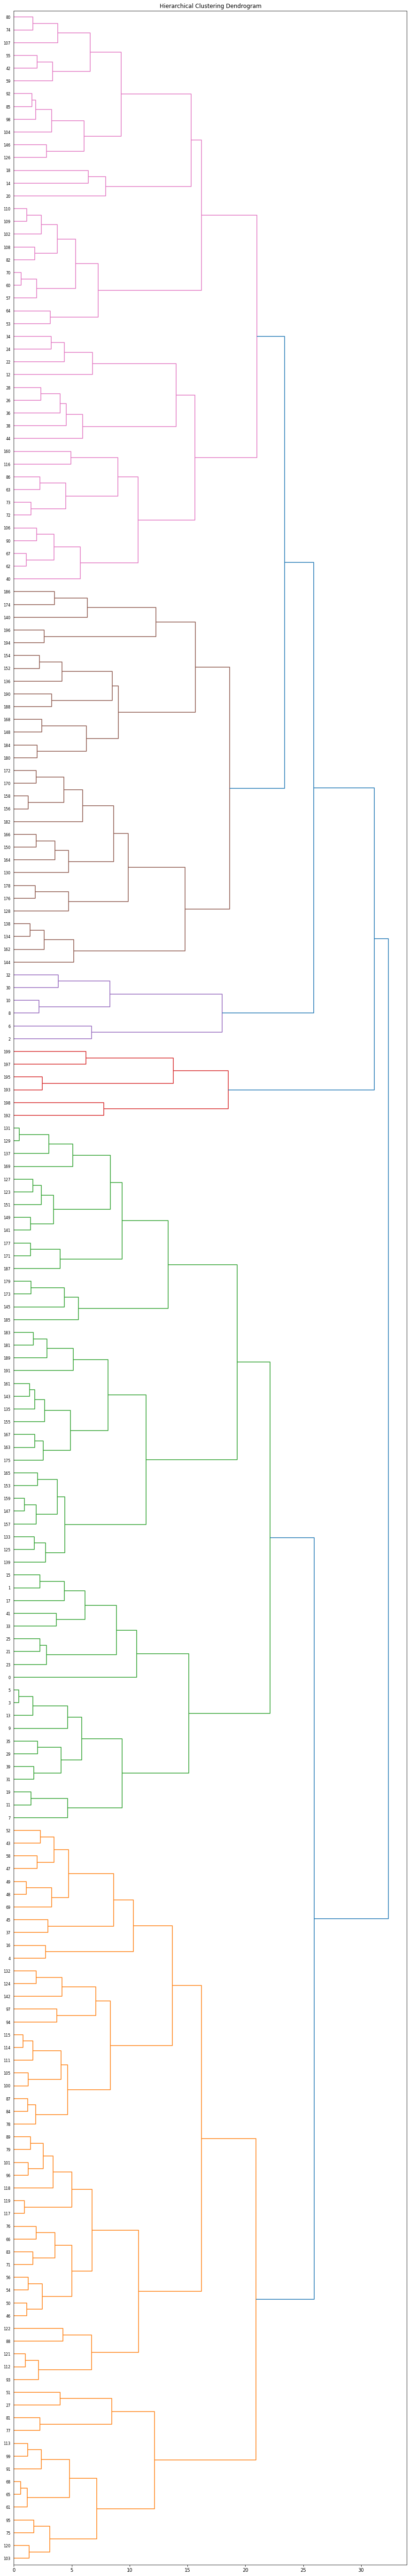

In [151]:
# Denrogram
fig = plt.figure(figsize = (15,100))
plt.title('Hierarchical Clustering Dendrogram')
dendro = dendrogram(Z, leaf_rotation = 0, leaf_font_size = 8, orientation = 'right')

In [154]:
# Agglomerative
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = ClusterNum, linkage = 'complete')
agglom.fit(dm)
labels = agglom.labels_
df['Agglomerative Cluster'] = labels

C:\Users\Amirh.Dallalan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [155]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-means Cluster,Agglomerative Cluster
0,1,1,19,15,39,3,1
1,2,1,21,15,81,3,1
2,3,0,20,16,6,2,0
3,4,0,23,16,77,1,1
4,5,0,31,17,40,1,3


In [158]:
df.groupby(['Agglomerative Cluster']).mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-means Cluster
Agglomerative Cluster,,,,,,
0,101.246914,0.555556,49.839506,60.592593,29.024691,0.888889
1,107.763636,0.454545,29.563636,61.072727,81.127273,1.909091
2,196.666667,0.666667,33.333333,124.333333,58.833333,1.333333
3,82.620690,0.241379,32.879310,53.431034,49.551724,1.758621


**Agglomerative Clusters:**
* Clusrer 1: Middle-aged, Medium Income, High Spending Score
* Clusrer 2: Middle-aged, High Income, Medium Spending Score
* Clusrer 3: Middle-aged, Low Income, Low Spending Score
* Cluster 4: Old, Medium Income, Very Low Spending Score

## DBSCAN

In [160]:
# Xs
X[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [232]:
# DBSCAN
from sklearn.cluster import DBSCAN
r = 0.9
m = 8
db = DBSCAN(eps = r, min_samples = m).fit(X)
labels = db.labels_
labels[0:5]

array([-1,  1, -1,  0,  0], dtype=int64)

In [234]:
# Number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of Clusters: ', n_clusters_)
unique_labels = set(labels)
print('Clusters: ', unique_labels)

Number of Clusters:  4
Clusters:  {0, 1, 2, 3, -1}


In [239]:
df['DBSCAN Cluster'] = labels

C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_15292/3228207947.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,2], X[:,3], s = area, c = labels.astype(np.float), alpha = 0.5)


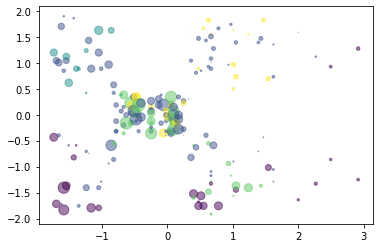

In [238]:
# Plot
plt.scatter(X[:,2], X[:,3], s = area, c = labels.astype(np.float), alpha = 0.5)


In [240]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-means Cluster,Agglomerative Cluster,DBSCAN Cluster
0,1,1,19,15,39,3,1,-1
1,2,1,21,15,81,3,1,1
2,3,0,20,16,6,2,0,-1
3,4,0,23,16,77,1,1,0
4,5,0,31,17,40,1,3,0


In [241]:
df.groupby(['DBSCAN Cluster']).mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-means Cluster,Agglomerative Cluster
DBSCAN Cluster,,,,,,,
-1,107.960000,0.64,42.200000,67.680000,19.400000,1.080000,0.360000
0,94.407767,0.00,37.310680,57.660194,54.766990,1.446602,1.611650
1,26.400000,1.00,25.800000,27.400000,75.900000,3.000000,1.400000
2,111.750000,1.00,51.694444,64.805556,36.055556,0.083333,0.166667
3,130.384615,1.00,28.961538,72.076923,71.423077,3.000000,1.769231


**DBSCAN Clusters:**
* Clusrer 1: Female, Medium Income, Meduim Spending Score
* Clusrer 2: Male, Young, Low Income, High Spending Score
* Clusrer 3: Male, Middle-Age, High Income, High Spending Score
* Clusrer 4: Male, Old, Medium Income, Low Spending Score